# 0.) Import and Clean data

In [115]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [117]:
#drive.mount('/content/gdrive/', force_remount = True)

In [118]:
df = pd.read_csv('bank-additional-full (1).csv', sep=';')

In [119]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [120]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [121]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

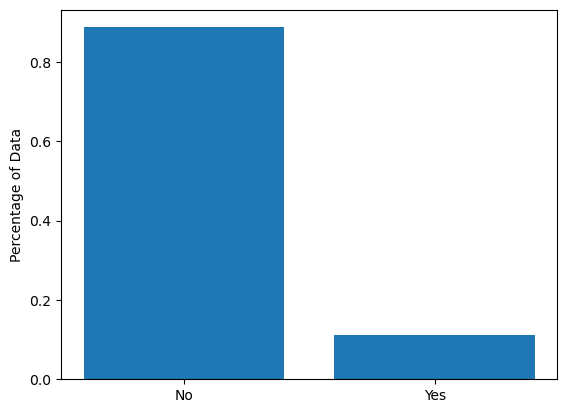

In [122]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [123]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [124]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [125]:
###############
###TRANSFORM###    SMOTE??
###############

smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)


# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [126]:
dtree_reg = DecisionTreeClassifier(max_depth = 3)
dtree_reg.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.18\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.491\ngini = 0.283\nsamples = 19439\nvalue = [16126, 3313]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.11\nsamples = 10577\nvalue = [9959, 618]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.092\nsamples = 10370\nvalue = [9868, 502]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.493\nsamples = 207\nvalue = [91, 116]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.322\ngini = 0.423\nsamples = 8862\nvalue = [6167, 2695]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.483\nsamples = 6405\nvalue = [3795, 2610]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 2457\nvalue = [2372, 85]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.418\nsamples = 31721\nvalue = [9454, 22267]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.827\ngini = 0.339\nsamples = 26035\nvalue = [5629, 20406]\nclass = 

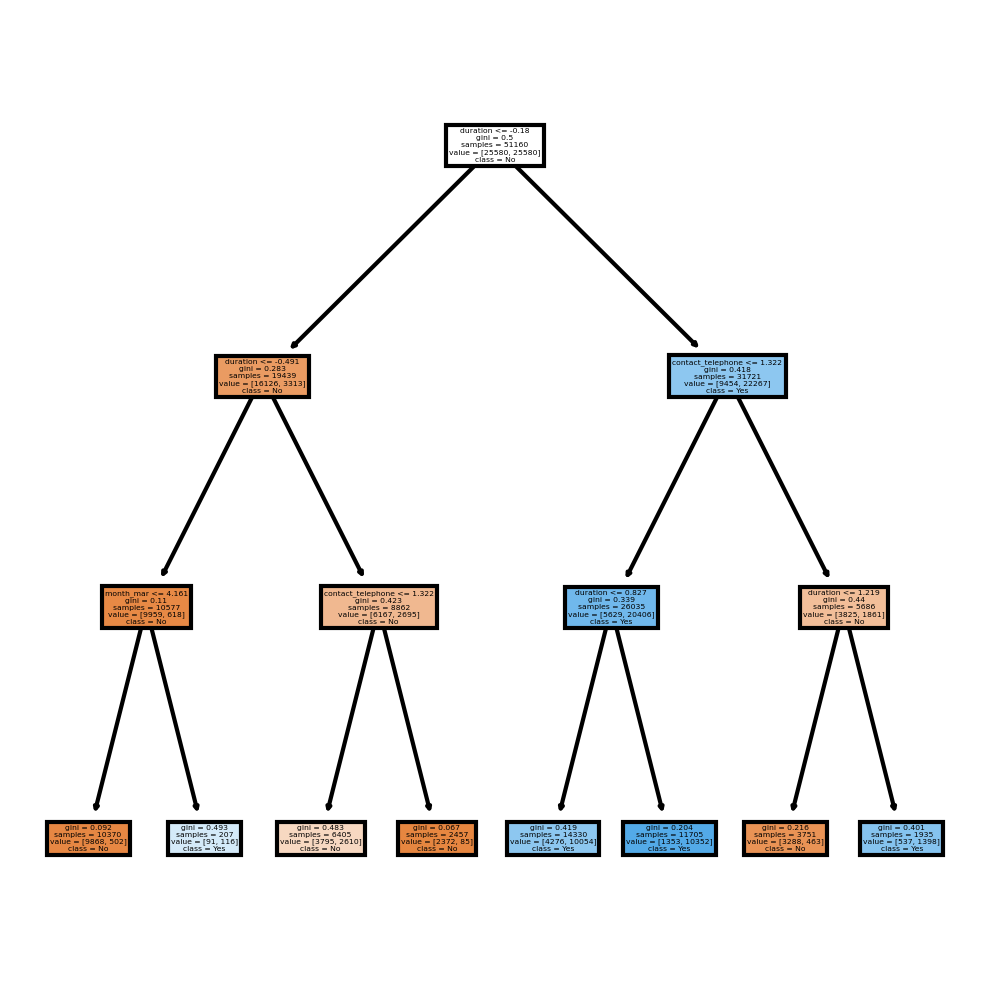

In [127]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_reg, filled = True, feature_names = X.columns.tolist(), class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [128]:
y_pred = dtree_reg.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

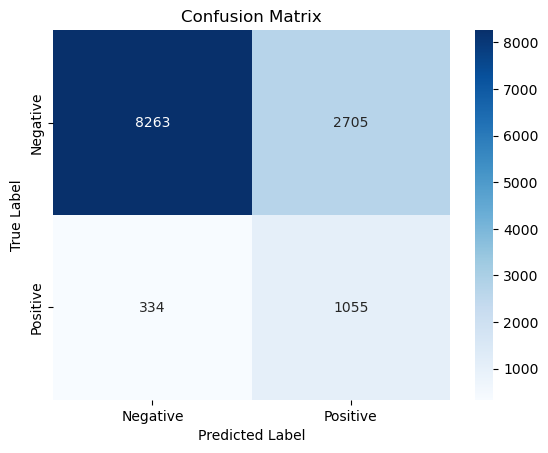

In [129]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [130]:
#Optimize depth
dtree = DecisionTreeClassifier(max_depth=3)

In [131]:
bagging = BaggingClassifier(estimator = dtree, 
                 n_estimators = 100,
                 max_samples = 0.5,
                 max_features = 1)

bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

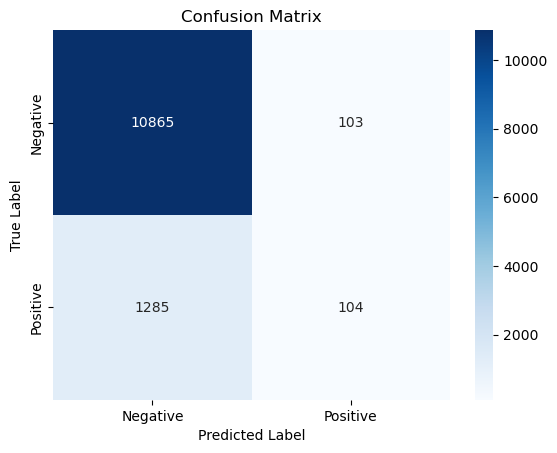

In [133]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [134]:
from sklearn.ensemble import AdaBoostClassifier

In [135]:
#Optimize depth
dtree = DecisionTreeClassifier(max_depth=3)

In [136]:
boost = AdaBoostClassifier(estimator = dtree, 
                 n_estimators = 50,
                 )

boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
#y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

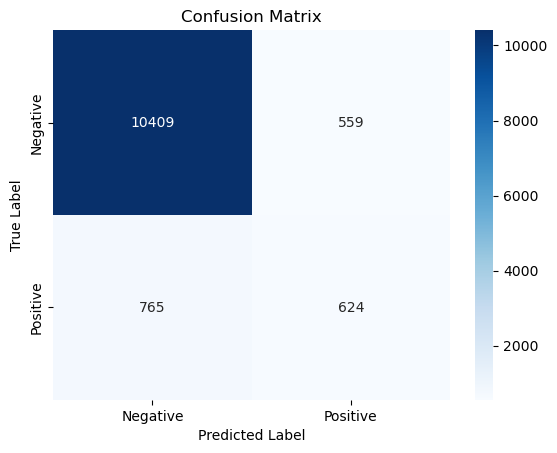

In [138]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic Regression on a decision tree a boosted tree and a bagged tree, interpret coefficients.

# Interpret coefficients and signifigance

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#from mlens.ensemble import SuperLearner

In [140]:
predictions = [bagging.predict(X_scaled),boost.predict(X_scaled),dtree_reg.predict(X_scaled)]

In [141]:
X_base_learners = np.column_stack(predictions)

In [142]:
super_learner = LogisticRegression()

In [143]:
super_learner.fit(X_base_learners,y_train)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [144]:
super_learner.coef_

array([[2.72065064, 3.84070208, 1.61110047]])

### Findings

The coefficients for all three models are positive. This indicates that each model does have an impact on the outcome to their varying degrees. The models start with bagging, boosting, and then the original decision tree. The most influencial model from this is the boosting model since the coefficient of 4.437 has the most weight in comparison to the other two models, followed by the bagging model, and then the original decision tree. These coefficients indicate the boosting model is the highest performing model of the three and has the most influence when fitting the a model using information from the the three.